## SUPPORT VECTOR MACHINE

### Task 1: Exploratory Data Analysis (EDA)

##### 1) Load the dataset and perform fundamental data exploration.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [34]:
df=pd.read_csv('Pharma_Industry.csv')

In [35]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [36]:
df.shape

(500, 6)

In [37]:
### checking missing values
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [38]:
### There are no missing values

In [39]:
### checking for duplicates
df.duplicated().sum()

0

In [40]:
### There are no duplicate values

In [41]:
### checking outliers
df.boxplot()

<Axes: >

In [42]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

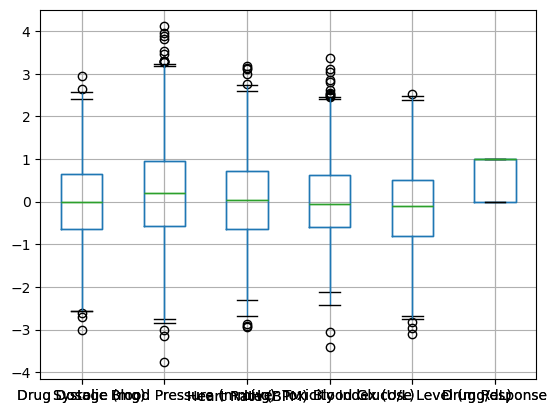

In [43]:
df.boxplot()
plt.show()

##### 2) Utilize histograms, box plots, or density plots to understand feature distributions.

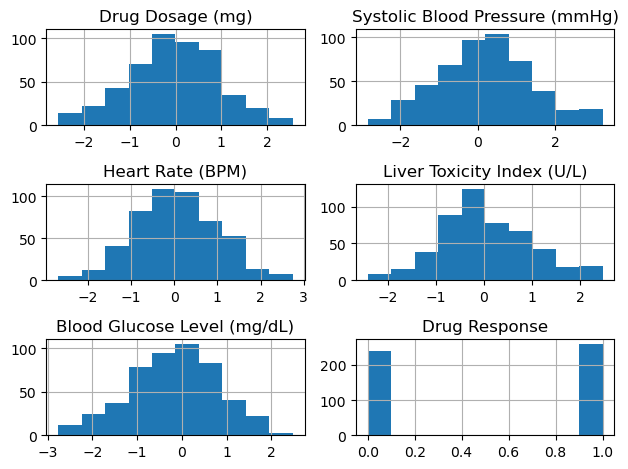

In [44]:
### Histogram
df.hist()
plt.tight_layout()
plt.show()

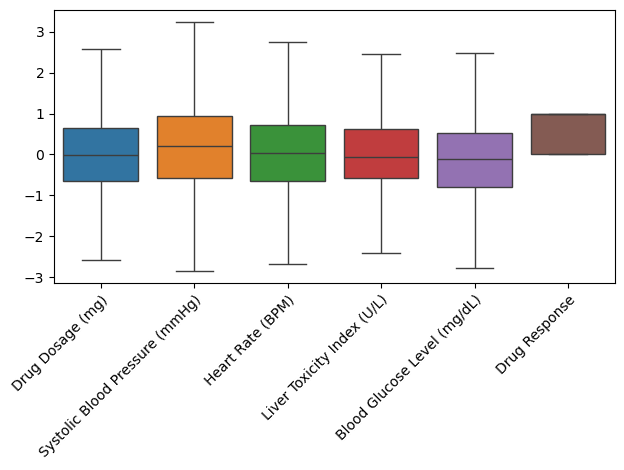

In [45]:
### boxplot
sns.boxplot(data=df)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.tight_layout() # Adjusts subplot params for tight layout
plt.show()

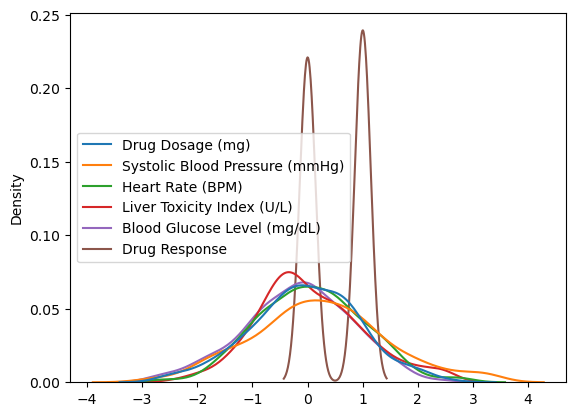

In [46]:
sns.kdeplot(data=df)
plt.show()

##### 3) Investigate feature correlations to discern relationships within the data.

In [47]:
corr=df.corr()
corr

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.087760,0.040512,0.128059,0.010070,0.043340
Systolic Blood Pressure (mmHg),0.087760,1.000000,-0.041466,0.273864,0.041263,0.308012
Heart Rate (BPM),0.040512,-0.041466,1.000000,0.004618,0.051423,-0.011235
Liver Toxicity Index (U/L),0.128059,0.273864,0.004618,1.000000,0.229714,0.437289
Blood Glucose Level (mg/dL),0.010070,0.041263,0.051423,0.229714,1.000000,0.169445
Drug Response,0.043340,0.308012,-0.011235,0.437289,0.169445,1.000000


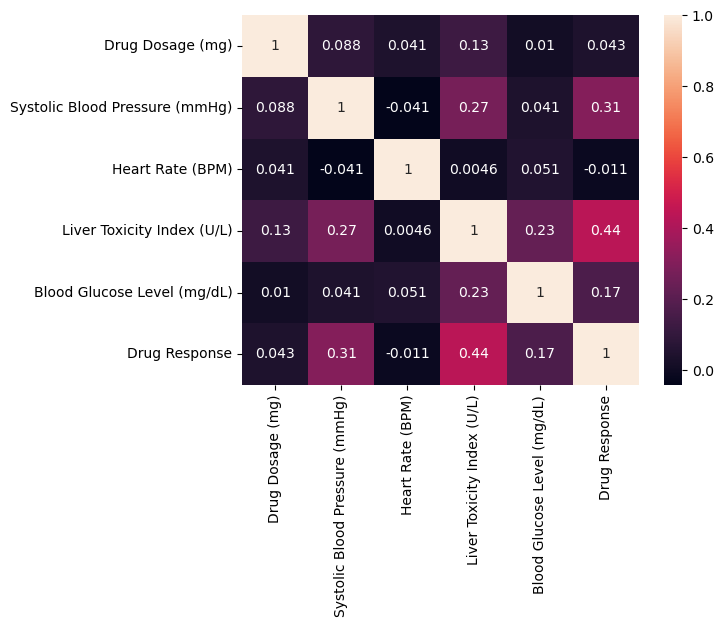

In [48]:
sns.heatmap(corr,annot=True)
plt.show()

In [49]:
### Here every features has very low correlation with every other feature. So there is no need to remove any feature

### Task 2: Data Preprocessing

##### 1) Encode categorical variables if necessary.

In [50]:
df.dtypes

Drug Dosage (mg)                  float64
Systolic Blood Pressure (mmHg)    float64
Heart Rate (BPM)                  float64
Liver Toxicity Index (U/L)        float64
Blood Glucose Level (mg/dL)       float64
Drug Response                       int64
dtype: object

In [51]:
### There is only one categorical variable (Drug Response) which is the target and it is already encoded

##### 2) Split the dataset into training and testing sets.

In [52]:
target=df[['Drug Response']]
features=df.drop(columns=['Drug Response'])

In [53]:
target.head()

,Drug Response
0,1
1,1
2,0
3,1
4,1


In [54]:
features.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.463913,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130


In [58]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


### Task 3: Data Visualization

##### 1) Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

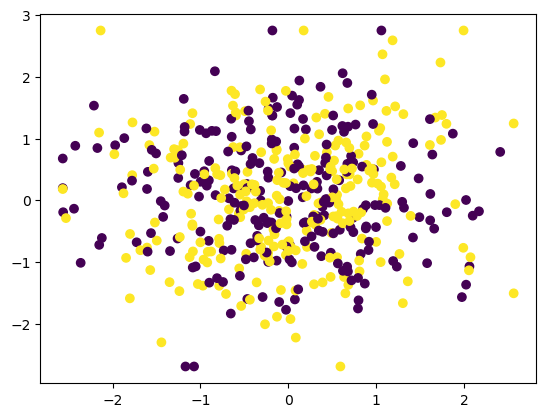

In [59]:
### scatter plot
plt.scatter(x=df['Drug Dosage (mg)'],y=df['Heart Rate (BPM)'],c=df['Drug Response'])
plt.show()

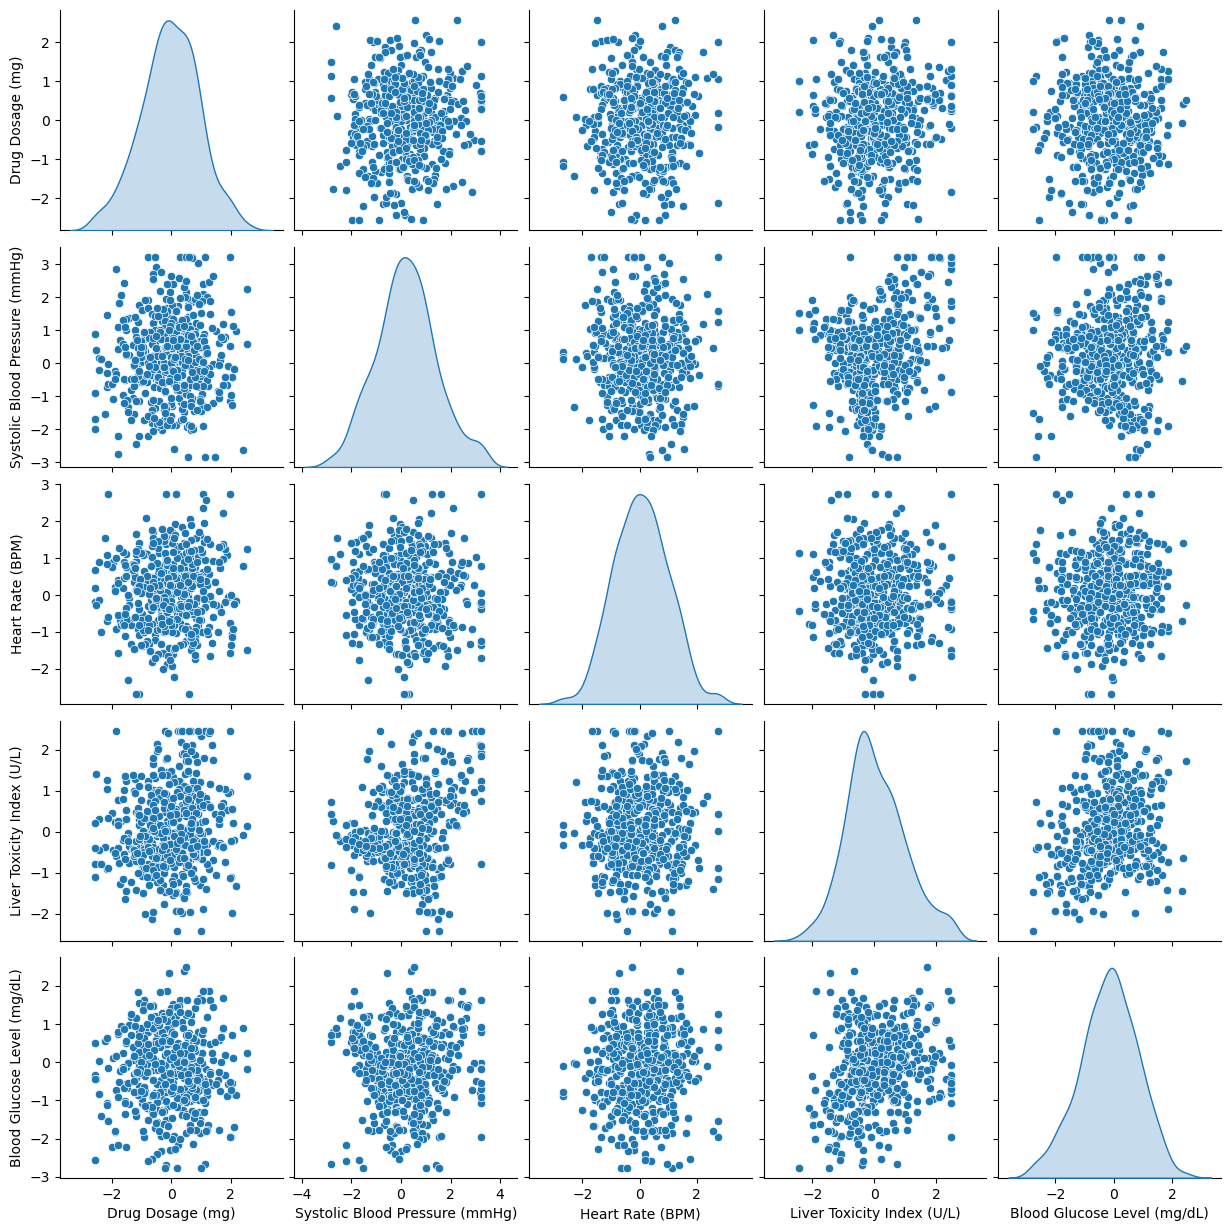

In [60]:
### pair plot
sns.pairplot(data=features,diag_kind='kde')
plt.show()

##### 2) Visualize class distributions to gauge dataset balance or imbalance.

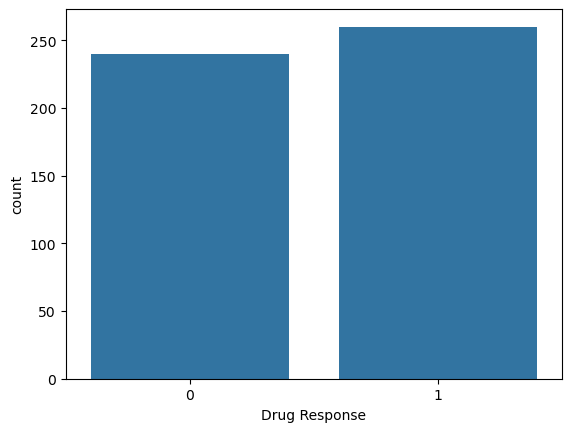

In [61]:
sns.countplot(data=df[['Drug Response']],x='Drug Response')
plt.show()

### Task 4: SVM Implementation

##### 1) Implement a basic SVM classifier using Python libraries like scikit-learn.

In [62]:
svc=SVC(C=1,kernel='linear')

##### 2) Train the SVM model on the training data.

In [63]:
svc.fit(x_train,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [64]:
y_pred_train=svc.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.728

##### 3) Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [65]:
y_pred_test=svc.predict(x_test)
accuracy_score(y_pred_test,y_test)

0.736

In [66]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        60
           1       0.74      0.77      0.75        65

    accuracy                           0.74       125
   macro avg       0.74      0.73      0.73       125
weighted avg       0.74      0.74      0.74       125



### Task 5: Visualization of SVM Results

##### 1) Visualize classification results on the testing data.

In [68]:
conf=confusion_matrix(y_test,y_pred_test)
conf

array([[42, 18],
       [15, 50]], dtype=int64)

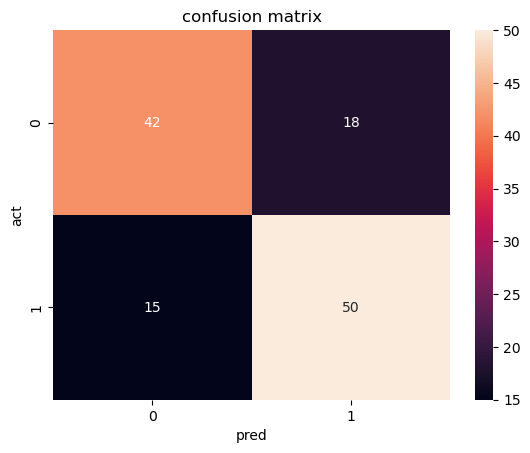

In [69]:
sns.heatmap(conf,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion matrix')
plt.show()

### Task 6: Parameter Tuning and Optimization

##### 1) Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [74]:
params={'kernel':['linear','rbf','poly','sigmoid'],'C':[0.1,1,10,100],'gamma':[0.1,0.2,0.5,1]}

In [75]:
grid_search=GridSearchCV(svc,params,cv=5)

In [76]:
grid_search.fit(x_train,y_train)

,estimator,"SVC(C=1, kernel='linear')"
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.1, 0.2, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [77]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [78]:
svc=SVC(C=1,kernel='rbf',gamma=0.2)

In [79]:
svc.fit(x_train,y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,0.2
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [82]:
y_pred_optimized=svc.predict(x_train)
accuracy_score(y_pred_optimized,y_train)

0.792

In [81]:
### So the best performance is given by rbf kernel with a gamma value of 0.2 and C=1

### Task 7: Comparison and Analysis

##### 1) Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


In [91]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.1, 1, 10,100]
Gamma=[0.1,0.2,0.5,1]
best_acc = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        for G in Gamma:
            model = SVC(kernel=kernel, C=C, random_state=42)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Kernel: {kernel}, C: {C},Gamma:{G}  Accuracy: {acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'C': C}

print("\nBest Accuracy:", best_acc)
print("Best Parameters:", best_params)

Kernel: linear, C: 0.1,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 0.1,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 1,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 10,Gamma:1  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.1  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.2  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:0.5  Accuracy: 0.7360
Kernel: linear, C: 100,Gamma:1  Accuracy: 0.7360
Kernel: rbf, C: 0.1,Gamma:0.1  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:0.2  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:0.5  Accuracy: 0.7600
Kernel: rbf, C: 0.1,Gamma:1  Accuracy: 0.7600
Kernel: rbf, C

##### 2) Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

##### 3) Discuss practical implications of SVM in real-world classification tasks.

Text classification, Bioinformatics, Image Recognition, Medical Diagnosis